<a href="https://colab.research.google.com/github/kamto101/Data-Analysis-Portfolio/blob/main/DSRM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Physical Activity Monitoring Report (PAMAP_2 DATASET)**

**Table of Contents**

1. Overview


2. Data preprocessing


3. Exploratory Data Analysis


4. Hypothesis Testing


5. Model building


6. Summary

7. Recommendation


8. References

**1. Overview**

This report aims to analyse the the PAMAP2 dataset. it will consist of the following actions to meet specific requirements.



1.  Carry out thorough exploratory data analysis 

2. appropriately handle missing or dirty data

2.  develop and test at least one hypothesis for a relationship between a single pair of attributes

3.  develop and test at least one model which uses multiple attributes to make predictions.




**1.1 Objective**

To derive actionable insights from extensive data analysis to aid the goal of creating software and hardware that can determine the amount and type of physical activity that is being carried out.

**1.2 Data collection**

The dataset contains data of 18 different physical activities performed by 9 subjects. The data was collected from the subjects wearing the following:

**Hardware information**

According to the readme file, the following listed below were the hardware used to collect the data from the 9 subjects

1.  Three colibri wireless IMU's(Initial Measurement Units): The IMU's had a sampling frequency of 100Hz, they were also positioned in different parts of the body.

    *   1 IMU over the wrist on the dominant arm
    *   1 IMU on the chest

    *   1 IMU on the dominant side's ankle


2.   HR-monitor: BM-CS5SR from BM innovations GmbH

    *   The sampling frequency of the heart rate monitor is 90hz

3.   Companion unit: Viliv S5 UMPC
    * Intel Atom Z520 CPU (1.33GHz) and 1GB of RAM
    * labeling the different performed activities was done via a GUI running on the Viliv


**Physical activity information**



Physical activitiy is simply any voluntarily body movement the body performs that burns calories. The Pamap datataset contains 18 different physical activities. They will be listed according to their activity IDs in the dataset:


1. lying


2. sitting


3. standing


4. walking


5. running


6. cycling


7. Nordic walking


9. watching TV


10. computer work


11. car driving


12. ascending stairs


13. descending stairs


16. vacuum cleaning


17. ironing


18. folding laundry


19. house cleaning


20. playing soccer


24. rope jumping



**Subject Information**


This is the information regarding the subjects that performed the different physical activities.

*   The subjects are mainly employees or students at DFKI
*   The subjects consist of 1 female and 8 males

*   aged 27.22 ± 3.31 years
*   BMI 25.11 ± 2.62 kgm-2



There are two sets of data, optional and protocol. All the subjects performed the protocol activities but a few undertook the optional activities. The data was stored in a text-files(.dat) format.

**2. Data Preprocessing**

To begin the exploratory data analysis, the dataset needs to be preprocessed. the dataset did not have headers so we have created header tags according to the information in the readme file. 

In [ ]:
#to begin, we import necessary libraries in python.
import numpy as np
import pandas as pd
import random
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


In [ ]:
#creating header tags for the dat files 
#the header tags in numbers will be deleted because the columns are not necessary according to the read me file
headers = ['timestamp',
           'activityID',
           'heartrate_bpm',
           'imu_hand_temp',
           'imu_hand_3d_acceleration_1',
           'imu_hand_3d_acceleration_2',
           'imu_hand_3d_acceleration_3',
           '5',
           '6',
           '7',
           'imu_hand_3d_gyroscope_1',
           'imu_hand_3d_gyroscope_2',
           'imu_hand_3d_gyroscope_3',
           'imu_hand_3d_magnetometer_1',
           'imu_hand_3d_magnetometer_2',
           'imu_hand_3d_magnetometer_3',
           '14',
           '15',
           '16',
           '17',
           'imu_chest_temp',
           'imu_chest_3d_acceleration_1',
           'imu_chest_3d_acceleration_2',
           'imu_chest_3d_acceleration_3',
           '5b',
           '6b',
           '7b',
           'imu_chest_3d_gyroscope_1',
           'imu_chest_3d_gyroscope_2',
           'imu_chest_3d_gyroscope_3',
           'imu_chest_3d_magnetometer_1',
           'imu_chest_3d_magnetometer_2',
           'imu_chest_3d_magnetometer_3',
           '14b',
           '15b',
           '16b',
           '17b',
           'imu_ankle_temp',
           'imu_ankle_3d_acceleration_1',
           'imu_ankle_3d_acceleration_2',
           'imu_ankle_3d_acceleration_3',
           '5c',
           '6c',
           '7c',
           'imu_ankle_3d_gyroscope_1',
           'imu_ankle_3d_gyroscope_2',
           'imu_ankle_3d_gyroscope_3',
           'imu_ankle_3d_magnetometer_1',
           'imu_ankle_3d_magnetometer_2',
           'imu_ankle_3d_magnetometer_3',
           '14c',
           '15c',
           '16c',
           '17c',
           ]


  


In [ ]:
#creating activity id dicts
Activity_ID = {1: "lying",
               2: "sitting",
               3: "standing",
               4: "walking",
               5: 'running',
               6: 'cycling',
               7: 'Nordic_walking', 
               9: 'watching_TV',
               10: 'computer_work',
               11: 'car_driving',
               12: 'ascending_stairs',
               13: 'descending_stairs',
               16: 'vacuum_cleaning',
               17: 'ironing',
               18: 'folding_laundry',
               19: 'house_cleaning',
               20: 'playing_soccer',
               24: 'rope_jumping',
               0:  'other (transient activities)'}#this will be deleted because it is not necessary according to readme file

In [ ]:
#connecting google drive to the notebook to be able to access the data

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the protocol files into the notebook
P_101 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject101.dat', sep=' ', names=headers)
P_102 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject102.dat', sep=' ', names=headers)
P_103 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject103.dat', sep=' ', names=headers)
P_104 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject104.dat', sep=' ', names=headers)
P_105 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject105.dat', sep=' ', names=headers)
P_106 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject106.dat', sep=' ', names=headers)
P_107 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject107.dat', sep=' ', names=headers)
P_108 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject108.dat', sep=' ', names=headers)
P_109 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Protocol/subject109.dat', sep=' ', names=headers)

In [ ]:
#reading the optional files into the notebook
O_101 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Optional/subject101.dat', sep = ' ', names = headers)
O_105 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Optional/subject105.dat', sep = ' ', names = headers)
O_106 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Optional/subject106.dat', sep = ' ', names = headers)
O_108 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Optional/subject108.dat', sep = ' ', names = headers)
O_109 = pd.read_table('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/Optional/subject109.dat', sep = ' ', names = headers)

In [ ]:
subject_information = pd.read_csv('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/subjectInformation.csv',index_col = None)
performed_activities = pd.read_csv('/content/drive/MyDrive/DSRM_Notebooks/dataset/Dataset/PerformedActivitiesSummary.csv',index_col = None)

**2.1 Merging Data files**

The data was stored in seperate files, protocol files and optional files. data merging is a necessary step in the analysis because the dataset is large and stored in different files. Data merging will make the analysis easier and faster. Since the files have the same number of columns and header values,they can be merged into one dataframe.

In [ ]:
#convert the dataframes into a list
list_of_dataframes = [P_101,P_102,P_103,P_104,P_105,P_106,P_107,P_108,P_109,O_101,O_105,O_106,O_108,O_109]
#create a list of subject tags
list_of_subjects = ['subject101p','subject102p','subject103p','subject104p','subject105p','subject106p','subject107p','subject108p','subject109p','subject101o','subject105o','subject106o','subject108o','subject109o']
new_data = []
i = 0 
for d in list_of_dataframes:
    d['subject'] = list_of_subjects[i]
    i+=1
    new_data.append(d)

In [ ]:
#merging the dataframe to check the analysis together
data = pd.concat(new_data)

**2.2 Understanding the data**

it is important to look at the dataframe to understand various features of the data.

In [ ]:
data.head()

,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,5,6,7,...,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3,14c,15c,16c,17c,subject
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,subject101p
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,subject101p
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,subject101p
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,subject101p
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,subject101p


In [ ]:
data.shape

(3850505, 55)

The data comprises of 55 columns and 3,850,505 rows

In [ ]:
data.columns

Index(['timestamp', 'activityID', 'heartrate_bpm', 'imu_hand_temp',
       'imu_hand_3d_acceleration_1', 'imu_hand_3d_acceleration_2',
       'imu_hand_3d_acceleration_3', '5', '6', '7', 'imu_hand_3d_gyroscope_1',
       'imu_hand_3d_gyroscope_2', 'imu_hand_3d_gyroscope_3',
       'imu_hand_3d_magnetometer_1', 'imu_hand_3d_magnetometer_2',
       'imu_hand_3d_magnetometer_3', '14', '15', '16', '17', 'imu_chest_temp',
       'imu_chest_3d_acceleration_1', 'imu_chest_3d_acceleration_2',
       'imu_chest_3d_acceleration_3', '5b', '6b', '7b',
       'imu_chest_3d_gyroscope_1', 'imu_chest_3d_gyroscope_2',
       'imu_chest_3d_gyroscope_3', 'imu_chest_3d_magnetometer_1',
       'imu_chest_3d_magnetometer_2', 'imu_chest_3d_magnetometer_3', '14b',
       '15b', '16b', '17b', 'imu_ankle_temp', 'imu_ankle_3d_acceleration_1',
       'imu_ankle_3d_acceleration_2', 'imu_ankle_3d_acceleration_3', '5c',
       '6c', '7c', 'imu_ankle_3d_gyroscope_1', 'imu_ankle_3d_gyroscope_2',
       'imu_ankle_3d_g

**2.3 Data Cleaning**

From the dataset above, it can be seen that data cleaning is required.

To clean the data:

The columns 5 - 7 will be dropped because according to the readme file  due to high impacts caused by certain movements with acceleration over 6g, it gets saturated sometimes. Therefore, the use of the data from the first accelerometer (with the scale of ±16g) is recommended. 

columns 14 - 17 will also be dropped because they are invalid in the data collection

In [ ]:
#dropping unneccessary columns
data = data.drop(['5','6','7','14','15','16','17','5b','6b','7b','14b','15b','16b','17b','5c','6c','7c','14c','15c','16c','17c'], axis = 1)

In [ ]:
data.columns

Index(['timestamp', 'activityID', 'heartrate_bpm', 'imu_hand_temp',
       'imu_hand_3d_acceleration_1', 'imu_hand_3d_acceleration_2',
       'imu_hand_3d_acceleration_3', 'imu_hand_3d_gyroscope_1',
       'imu_hand_3d_gyroscope_2', 'imu_hand_3d_gyroscope_3',
       'imu_hand_3d_magnetometer_1', 'imu_hand_3d_magnetometer_2',
       'imu_hand_3d_magnetometer_3', 'imu_chest_temp',
       'imu_chest_3d_acceleration_1', 'imu_chest_3d_acceleration_2',
       'imu_chest_3d_acceleration_3', 'imu_chest_3d_gyroscope_1',
       'imu_chest_3d_gyroscope_2', 'imu_chest_3d_gyroscope_3',
       'imu_chest_3d_magnetometer_1', 'imu_chest_3d_magnetometer_2',
       'imu_chest_3d_magnetometer_3', 'imu_ankle_temp',
       'imu_ankle_3d_acceleration_1', 'imu_ankle_3d_acceleration_2',
       'imu_ankle_3d_acceleration_3', 'imu_ankle_3d_gyroscope_1',
       'imu_ankle_3d_gyroscope_2', 'imu_ankle_3d_gyroscope_3',
       'imu_ankle_3d_magnetometer_1', 'imu_ankle_3d_magnetometer_2',
       'imu_ankle_3d_magneto

In [ ]:
data.shape

(3850505, 34)

After dropping some columns, the dataframe has reduced to 34 columns 

**2.4 Filtering the data**

The optional dataset will be filtered out because i believe since the activities were performed by only a few of the subjects, it will not aid our analysis.

data labelled with activity ID - 0 will be dropped because they are transient activities according to the readme file which are not required for analysis.

data with heartrate column below 54 and above 201 will be removed because normal heartrate is between 60 and 202.

data with any temperature column below 30 will be dropped because any temperature below 30 is inaccurate.

In [ ]:
data = data.set_index('subject')
data = data.drop(['subject101o','subject105o','subject106o','subject108o','subject109o'], axis = 0)

In [ ]:
data = data[data['activityID']>0]#mentioned in the read me file

In [ ]:
data = data[data['heartrate_bpm']>54]

In [ ]:
data = data[data['heartrate_bpm']<201]

In [ ]:
data = data[data['imu_hand_temp']>30]

In [ ]:
data = data[data['imu_chest_temp']>30]

In [ ]:
data = data[data['imu_ankle_temp']>30]

In [ ]:
data=data.reset_index(drop = False)

In [ ]:
data.isnull().sum()

subject                        0
timestamp                      0
activityID                     0
heartrate_bpm                  0
imu_hand_temp                  0
imu_hand_3d_acceleration_1     0
imu_hand_3d_acceleration_2     0
imu_hand_3d_acceleration_3     0
imu_hand_3d_gyroscope_1        0
imu_hand_3d_gyroscope_2        0
imu_hand_3d_gyroscope_3        0
imu_hand_3d_magnetometer_1     0
imu_hand_3d_magnetometer_2     0
imu_hand_3d_magnetometer_3     0
imu_chest_temp                 0
imu_chest_3d_acceleration_1    0
imu_chest_3d_acceleration_2    0
imu_chest_3d_acceleration_3    0
imu_chest_3d_gyroscope_1       0
imu_chest_3d_gyroscope_2       0
imu_chest_3d_gyroscope_3       0
imu_chest_3d_magnetometer_1    0
imu_chest_3d_magnetometer_2    0
imu_chest_3d_magnetometer_3    0
imu_ankle_temp                 0
imu_ankle_3d_acceleration_1    0
imu_ankle_3d_acceleration_2    0
imu_ankle_3d_acceleration_3    0
imu_ankle_3d_gyroscope_1       0
imu_ankle_3d_gyroscope_2       0
imu_ankle_

In [ ]:
data.shape

(160844, 34)

The dataframe has been reduced to 34 columns and 160844 rows. There are no longer NAN values. The dataframe is ready for exploratory data analysis

**2.5 Development and Testing data**

The data will be split into two equal parts. 50% will be the development set and the other 50% will be testing set. The development set will be used in the exploratory data analysis while the testing set will be used in hypothesis testing. This will aid in better analysis and will ensure no p-hacking.

In [ ]:
data = data.reset_index(drop = True)

random.seed(381)  #set random seed so the results can be replicated

development_data = data.sample(frac = 0.5,random_state = 381)
testing_data = data.loc[data.index.isin(development_data.index)]
print(development_data.shape)
print(testing_data.shape)

(80422, 34)
(80422, 34)


**3. Exploratory data analysis**

The objective of this report is to give actionable recommendations to the development of a software/hardware. in order to achieve the objective, the first step will be to explore the data to find relationships between variables and gain meaningful insights from the dataset.

In [ ]:
dev_data = development_data

In [ ]:
dev_data.describe()

,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
count,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,...,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000,80422.000000
mean,1560.920656,8.087265,104.787173,33.121595,-4.789561,3.432590,3.709535,-0.011700,0.039383,-0.010709,...,33.779620,9.202855,-0.413834,-2.668470,0.009734,-0.027119,0.006251,-31.194759,2.324023,17.413432
std,1017.224512,6.190019,26.166685,1.353601,5.994178,6.245571,3.689842,1.265779,0.828586,1.516728,...,1.068408,6.356752,7.442316,3.766177,1.087515,0.617737,1.923221,18.867051,21.673428,20.279242
min,37.920000,1.000000,57.000000,30.062500,-76.035400,-82.550900,-31.747600,-14.739100,-7.003590,-13.121500,...,30.062500,-76.722200,-155.513000,-158.830000,-11.058100,-5.745580,-10.384400,-172.236000,-135.604000,-100.864000
25%,695.082500,3.000000,84.000000,32.250000,-8.900590,1.152660,1.235200,-0.360765,-0.192548,-0.350784,...,33.125000,8.494410,-2.245932,-3.854827,-0.159436,-0.083665,-0.325686,-41.711150,-10.908775,3.064567
50%,1343.190000,6.000000,100.000000,33.375000,-5.259240,3.552265,3.440745,-0.006368,0.006115,-0.006158,...,34.062500,9.520470,-0.384658,-2.491405,0.005441,-0.003407,-0.001544,-33.187550,2.107025,19.147550
75%,2427.340000,16.000000,122.000000,34.125000,-0.719827,6.431033,6.559480,0.301080,0.243517,0.326305,...,34.562500,10.032475,1.546695,-1.157690,0.101723,0.102211,0.069242,-16.742575,18.527500,32.331325
max,3879.580000,24.000000,200.000000,35.500000,25.740500,130.466000,53.905200,15.918300,11.009500,11.519800,...,35.437500,155.655000,154.960000,97.672100,10.492300,6.410380,14.288100,71.449900,90.478100,135.144000


In [ ]:
dev_data.mean()

<ipython-input-262-f56386cf7f72>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dev_data.mean()


timestamp                      1560.920656
activityID                        8.087265
heartrate_bpm                   104.787173
imu_hand_temp                    33.121595
imu_hand_3d_acceleration_1       -4.789561
imu_hand_3d_acceleration_2        3.432590
imu_hand_3d_acceleration_3        3.709535
imu_hand_3d_gyroscope_1          -0.011700
imu_hand_3d_gyroscope_2           0.039383
imu_hand_3d_gyroscope_3          -0.010709
imu_hand_3d_magnetometer_1       20.297238
imu_hand_3d_magnetometer_2      -13.604624
imu_hand_3d_magnetometer_3      -24.690420
imu_chest_temp                   36.374465
imu_chest_3d_acceleration_1       0.349681
imu_chest_3d_acceleration_2       8.218116
imu_chest_3d_acceleration_3      -1.094945
imu_chest_3d_gyroscope_1          0.007372
imu_chest_3d_gyroscope_2          0.010040
imu_chest_3d_gyroscope_3         -0.022916
imu_chest_3d_magnetometer_1       4.735716
imu_chest_3d_magnetometer_2     -30.740733
imu_chest_3d_magnetometer_3       2.950431
imu_ankle_t

In [ ]:
dev_data.groupby(['activityID']).mean()

,timestamp,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,imu_hand_3d_gyroscope_3,imu_hand_3d_magnetometer_1,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
activityID,,,,,,,,,,,,,,,,,,,,,
1,206.093164,75.492932,32.717172,3.697037,2.110493,6.408502,-0.002735,0.003192,-0.004887,-0.536273,...,32.968392,0.527100,-6.383670,-3.709096,0.011025,-0.006532,0.005940,-17.789302,20.812979,0.007057
2,505.893673,80.019547,33.254321,-1.381660,4.344279,5.166596,-0.004227,0.010189,-0.007271,3.518340,...,33.632412,8.825887,-0.307635,-2.535469,0.006696,-0.004779,0.005507,-22.708202,2.497076,21.066596
3,732.766014,88.593616,33.628243,-7.057000,3.238089,2.654225,-0.003937,-0.002643,-0.000776,27.498791,...,33.895604,9.391311,-0.798491,-2.071690,0.004143,-0.003537,0.003385,-22.876380,-0.645366,24.431041
4,2436.254700,112.307584,32.466474,-9.993284,2.513337,1.889917,-0.056105,0.026374,-0.031327,38.175625,...,33.829062,11.922597,0.575451,-3.154908,-0.002542,-0.102038,-0.040077,-37.071870,-0.917309,15.725746
5,3387.583275,157.237552,32.042639,-6.829111,4.283493,1.564039,0.020032,0.331833,-0.088896,19.499648,...,33.091330,13.212700,2.649128,-3.867405,0.074486,0.045981,0.189067,-37.538403,-6.685245,13.363693
6,2986.797019,124.623826,32.425745,-4.324505,2.964461,7.534111,-0.050044,-0.011781,0.104217,29.290249,...,33.059364,9.308399,1.284499,-2.055274,0.117826,0.035533,-0.021318,-41.148536,-5.674696,14.036923
7,2925.901139,123.630324,31.932478,-4.207207,4.911881,2.478071,0.010893,0.047617,0.000773,18.273249,...,33.523522,12.222987,0.413188,-3.342917,-0.002545,-0.117605,-0.003587,-37.633592,-0.245210,14.087650
12,1807.198968,129.527664,33.538642,-8.750346,3.635689,1.572886,-0.353000,0.174308,0.125338,38.085902,...,34.170349,9.730900,1.441130,-3.091146,0.341287,0.125327,-0.040236,-35.781580,-4.661422,13.544409
13,1910.491704,129.332772,33.323872,-6.291102,2.870901,3.654641,0.253172,-0.088899,-0.191650,32.117047,...,34.182360,10.840487,0.923594,-2.532973,-0.388168,-0.248207,0.089198,-36.921645,-4.216005,20.308575


**Findings**


From the data exploration done above, the following were noted.



1.   The mean heartrate is 104.7 bpm 
2.   The mean chest temperature is 36.3 degree celsius
3.   The mean ankle temperature is 33.7 degree celsius
4.   The mean hand temperature is 33.1 degree celsius



In [ ]:
dev_data

,subject,timestamp,activityID,heartrate_bpm,imu_hand_temp,imu_hand_3d_acceleration_1,imu_hand_3d_acceleration_2,imu_hand_3d_acceleration_3,imu_hand_3d_gyroscope_1,imu_hand_3d_gyroscope_2,...,imu_ankle_temp,imu_ankle_3d_acceleration_1,imu_ankle_3d_acceleration_2,imu_ankle_3d_acceleration_3,imu_ankle_3d_gyroscope_1,imu_ankle_3d_gyroscope_2,imu_ankle_3d_gyroscope_3,imu_ankle_3d_magnetometer_1,imu_ankle_3d_magnetometer_2,imu_ankle_3d_magnetometer_3
100147,subject106p,430.94,2,71.0,33.4375,-0.009391,8.552930,4.552610,-0.047115,0.011145,...,34.6875,9.548610,-1.101720,-2.767050,-0.047547,-0.036158,0.029111,-18.41920,-3.18956,12.41010
41481,subject102p,3462.86,7,125.0,30.2500,-3.339800,5.348450,3.936220,-0.572828,-0.215467,...,34.0625,20.406900,-2.361410,-0.949937,-2.203580,1.342190,-2.785320,-23.43480,-24.00240,-4.69679
98583,subject106p,205.95,1,62.0,33.3750,4.889090,-0.217525,8.196410,-0.015473,0.022506,...,34.5625,-0.133551,-9.464030,-3.509060,-0.006488,-0.000722,-0.012199,-17.19980,26.69650,-4.78197
134840,subject107p,2748.49,7,124.0,33.0000,-5.800890,11.216900,0.377209,-0.450670,-0.114042,...,32.4375,9.873390,-0.024914,-4.699880,-0.184468,0.000733,-0.865774,-47.24700,-14.87930,13.88240
47809,subject103p,891.96,3,80.0,32.4375,-8.834380,2.423160,2.940090,-0.267378,0.145254,...,33.3750,9.895170,-0.090676,-1.303370,0.021256,0.016670,-0.038746,-6.47282,-3.01688,23.60990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100580,subject106p,480.05,2,79.0,33.5000,0.499793,8.440010,5.099440,0.054998,-0.120982,...,34.7500,9.615650,-0.909786,-3.076270,0.050105,-0.041818,-0.017949,-17.62480,-4.25746,12.98150
24573,subject102p,274.11,1,77.0,33.8125,6.849620,2.672560,6.407120,-0.015891,-0.014769,...,34.6250,-0.362816,-9.309130,-3.705320,-0.020255,-0.005088,-0.010700,-12.89780,23.72300,-4.27391
81039,subject105p,1051.73,17,85.0,35.3125,-3.987660,7.262780,-3.161620,-0.028273,0.408930,...,34.5000,9.318700,-0.224133,-3.122160,0.146185,-0.017308,-0.060792,-35.63870,27.61170,37.27620
95428,subject105p,3406.91,5,157.0,33.8125,5.168820,-0.312255,2.119910,0.940142,-1.745670,...,34.0625,26.967200,17.480500,-13.431600,2.248050,1.187540,8.179240,-46.57530,-12.18490,22.10790


In [ ]:
dev_data3 = dev_data

To find out if there are any relationships in the dataset, we would plot correlations using a heatmap. A heatmap can be described as a two-dimensional representation of data with colors.

<ipython-input-266-623877773008>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "RdBu",ax=ax)


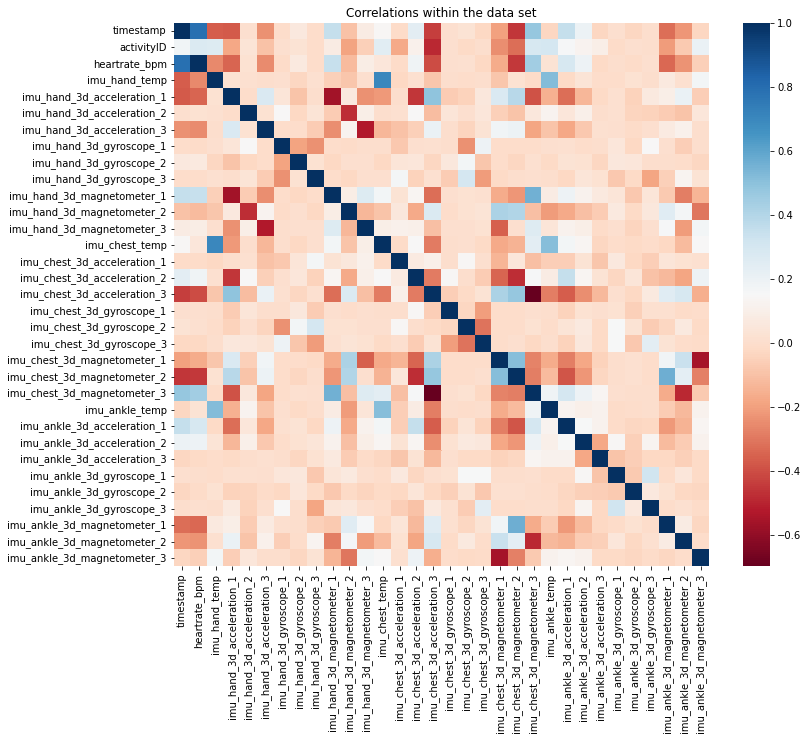

In [ ]:
#creating a seperate dataframe for correlation
dev_data3 = dev_data
data_corr = dev_data3.corr()

#dropping activity ID for correlation 
df_corr = data_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(12, 10))
#plotting the correlations 
#blue represents strong correlation 
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "RdBu",ax=ax)
plt.title('Correlations within the data set')
plt.show()

in this heatmap, colors represent the correlation. a variable represented by an intense blue color indicates a trend meanwhile a variable represented by a light color indicates little or no correlation. Variables such as imu chest 3d gyroscope and imu ankle gyroscope will not be focused on in this exploartory data analysis because they have weak correlation.

From the heatmap above, we can see that the chest and hand temperature are correlated. we can also note the hand and ankle temperature are correlated.

we will explore some variables:

1. Heartrate


2. Temperature i.e chest temp, ankle temp and hand temp

**3.1 Heartrate**

In [ ]:
dev_data['heartrate_bpm'].describe()

count    80422.000000
mean       104.787173
std         26.166685
min         57.000000
25%         84.000000
50%        100.000000
75%        122.000000
max        200.000000
Name: heartrate_bpm, dtype: float64

Text(0.5, 1.0, 'barchart showing heartrate and activity')

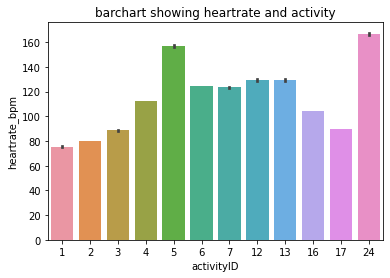

In [ ]:
heartrate_chart1 = sns.barplot(y=dev_data["heartrate_bpm"],x = dev_data['activityID'])
plt.title('barchart showing heartrate and activity')

**Findings**


 The followimg could be noted from the exploration of the heartrate variable


*   activities with the ID 24 and 5(rope skipping and running) have the highest heartrates
*   activities with the ID 1 and 2 (lying down and sitting) have the lowest heartrates.
*   the mean value for heartrate is 104.7 bpm
*   the maximum value for heartrate is 200 bpm
*   the minimum value for heartrate is 57 bpm






**3.2 Temperature**

In [ ]:
temp_data= dev_data.groupby('activityID')['imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()
#temp_data= temp_data.sort_values('imu_hand_temp', ascending = False )
temp_data

<ipython-input-269-e5aebd5e8bf9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_data= dev_data.groupby('activityID')['imu_hand_temp','imu_chest_temp','imu_ankle_temp'].mean()


,imu_hand_temp,imu_chest_temp,imu_ankle_temp
activityID,,,
1,32.717172,35.086402,32.968392
2,33.254321,35.813454,33.632412
3,33.628243,36.155049,33.895604
4,32.466474,37.008262,33.829062
5,32.042639,35.112271,33.091330
6,32.425745,36.791266,33.059364
7,31.932478,36.417350,33.523522
12,33.538642,37.073420,34.170349
13,33.323872,37.025663,34.182360


Text(0.5, 1.0, 'barchart showing chest temperature and activity')

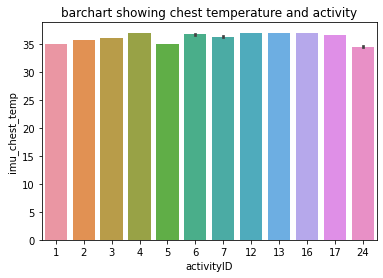

In [ ]:
chesttemp_boxplot = sns.barplot(y=dev_data["imu_chest_temp"],x = dev_data['activityID'])
plt.title('barchart showing chest temperature and activity')

Text(0.5, 1.0, 'barchart showing hand temperature and activity')

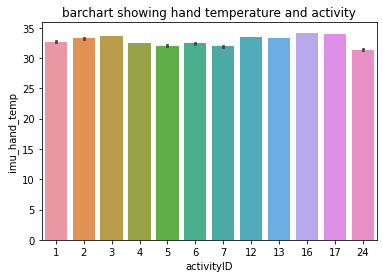

In [ ]:
handtemp_boxplot = sns.barplot(y=dev_data["imu_hand_temp"],x = dev_data['activityID'])
plt.title('barchart showing hand temperature and activity')

Text(0.5, 1.0, 'barchart showing ankle temperature and activity')

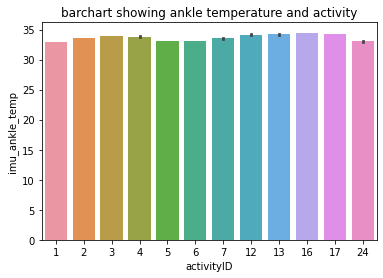

In [ ]:
ankletemp_boxplot = sns.barplot(y=dev_data["imu_ankle_temp"],x = dev_data['activityID'])
plt.title('barchart showing ankle temperature and activity')

In [ ]:
data['imu_chest_temp'].describe()

count    160844.000000
mean         36.376690
std           1.352527
min          32.187500
25%          35.500000
50%          36.625000
75%          37.562500
max          38.562500
Name: imu_chest_temp, dtype: float64

In [ ]:
data['imu_ankle_temp'].describe()

count    160844.000000
mean         33.778378
std           1.063591
min          30.062500
25%          33.125000
50%          34.062500
75%          34.562500
max          35.437500
Name: imu_ankle_temp, dtype: float64

In [ ]:
data['imu_hand_temp'].describe()

count    160844.000000
mean         33.123757
std           1.355588
min          30.062500
25%          32.250000
50%          33.375000
75%          34.125000
max          35.500000
Name: imu_hand_temp, dtype: float64

**Findings**

From exploration of the temperature variables, it can be noted that there are different temperature values for different activity Ids which means there are different temperature levels for different types of physical activity. 




**3.3 Classifying different types of physical activity**

According to the readme file, the subjects were made to undergo different types of physical activities. From the exploration of the temperature and heartrate variables we can also see there are different temperature and heartrate levels for each physical activity from the subjects. Therefore, Further exploration of the dataset will be conducted by classifiying the physical activities into:

1. Moving activities and Non-moving activities
2. Household chores and Non-household chores
3. Exercise activities and non-exercise activities


1. Moving activities and Non-moving activities

   * Moving activities(activities with continious movement of legs):

    Walking | running | cycling | Nordic walking | ascending stairs | descending stairs | vacuum cleaning | house cleaning | playing soccer | rope jumping

   * Non-moving activities(activities without continous movement of legs):
   
    Lying | sitting | standing | watching tv | computer work | car driving      | ironing |folding laundry.

2. Household chores and Non-household chores

  *  Household chores(activities done to keep the house neat and tidy):

    vacuum cleaning | house cleaning | ironing | folding laundry

   * Non-household chores:

    Walking | running | cycling | nordic walking | ascending stairs | descending stairs | playing soccer | lying | sitting | standing | watching tv | computer work | car driving |rope jumping  


3. Exercise activities and non-exercise activities

    * Exercise activities:

    Walking | running | cycling | nordic walking | ascending stairs | descending stairs | playing soccer | rope jumping.

    * Non-exercise activities:

    vacuum cleaning | house cleaning | ironing | folding laundry | lying | sitting | standing | watching tv | computer work | car driving.



In [ ]:
#Moving activities and Non-moving activities
Moving_activites = ['4','5','6','7','12','13','16','19','20','24']
Nonmoving_activities = ['1','2','3','9','10','11','17','18']

Moving_activitesDF = dev_data.loc[(dev_data['activityID']==4)|(dev_data['activityID']==5)|(dev_data['activityID']==6)|(dev_data['activityID']==7)|(dev_data['activityID']==12)|
                   (dev_data['activityID']==13)|(dev_data['activityID']==16)|(dev_data['activityID']==24)]

Nonmoving_activitesDF =dev_data.loc[(dev_data['activityID']==1)|(dev_data['activityID']==2)|(dev_data['activityID']==3)|(dev_data['activityID']==9)|(dev_data['activityID']==17)]



Text(0.5, 1.0, 'boxplot showing heart rate in moving and non moving activities')

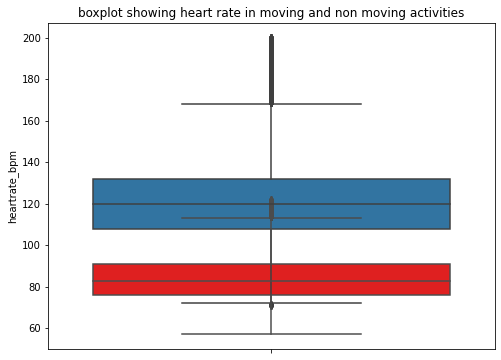

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=Moving_activitesDF["heartrate_bpm"])

leg_hr= sns.boxplot(y=Nonmoving_activitesDF["heartrate_bpm"], color = "red")
plt.title('boxplot showing heart rate in moving and non moving activities')

Text(0.5, 1.0, 'boxplot showing chest temperature rate in moving and non moving activities')

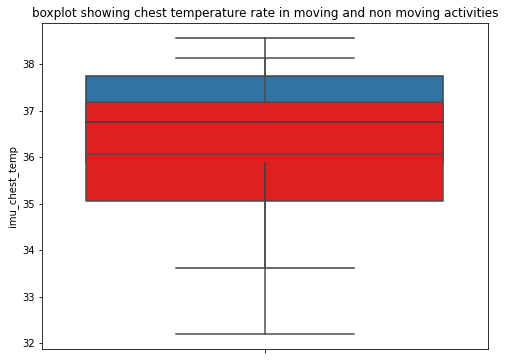

In [ ]:

fig, chest_temp = plt.subplots(figsize=(8,6))

chest_temp = sns.boxplot(y=Moving_activitesDF["imu_chest_temp"])

chest_temp = sns.boxplot(y=Nonmoving_activitesDF["imu_chest_temp"], color = "red")
plt.title('boxplot showing chest temperature rate in moving and non moving activities')

Text(0.5, 1.0, 'boxplot showing hand temperature in moving and non moving activities')

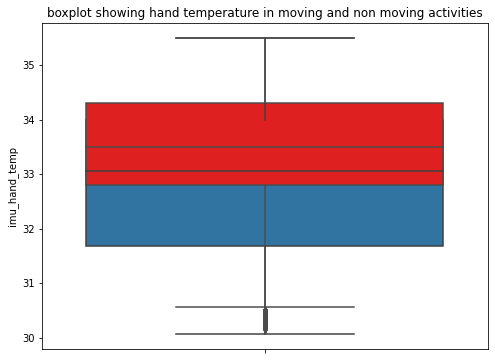

In [ ]:
fig, hand_temp = plt.subplots(figsize=(8,6))

hand_temp = sns.boxplot(y=Moving_activitesDF["imu_hand_temp"])

hand_temp = sns.boxplot(y=Nonmoving_activitesDF["imu_hand_temp"], color = "red")
plt.title('boxplot showing hand temperature in moving and non moving activities')

Text(0.5, 1.0, 'boxplot showing ankle temperature in moving and non moving activities')

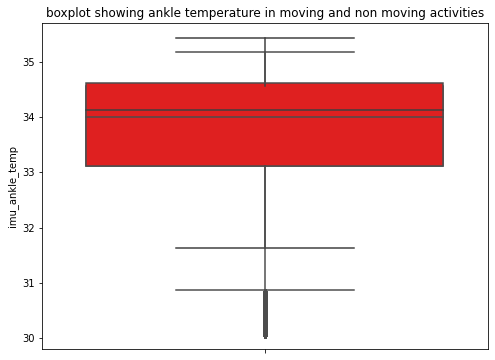

In [ ]:
fig, ankle_temp = plt.subplots(figsize=(8,6))

ankle_temp = sns.boxplot(y=Moving_activitesDF["imu_ankle_temp"])

ankle_temp = sns.boxplot(y=Nonmoving_activitesDF["imu_ankle_temp"], color = "red")
plt.title('boxplot showing ankle temperature in moving and non moving activities')

In [ ]:
#household chores and Non-household chores
household_chores = ['16','19','17','18']
Nonhousehold_chores = ['1','2','3','4','5','6','7','9','10','11','12','13','20','24']

household_choresDF = dev_data.loc[(dev_data['activityID']==16)|(dev_data['activityID']==19)|(dev_data['activityID']==17)|(dev_data['activityID']==18)]

Nonhousehold_choresDF =dev_data.loc[(dev_data['activityID']==1)|(dev_data['activityID']==2)|(dev_data['activityID']==3)|(dev_data['activityID']==4)|(dev_data['activityID']==5)|
(dev_data['activityID']==6)|(dev_data['activityID']==7)|(dev_data['activityID']==9)|(dev_data['activityID']==10)|(dev_data['activityID']==11)|
(dev_data['activityID']==12)|(dev_data['activityID']==13)|(dev_data['activityID']==20)|(dev_data['activityID']==24)]


Text(0.5, 1.0, 'boxplot showing heart rate in household chores and non household chores')

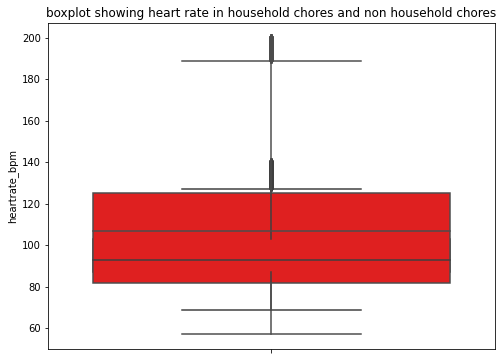

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

housechore_hr= sns.boxplot(y=household_choresDF["heartrate_bpm"])

nonhousechore_hr= sns.boxplot(y=Nonhousehold_choresDF["heartrate_bpm"], color = "red")
plt.title('boxplot showing heart rate in household chores and non household chores')

Text(0.5, 1.0, 'boxplot showing chest temperature in household chores and non household chores')

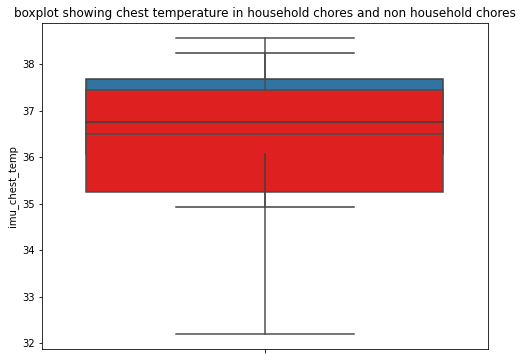

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=household_choresDF["imu_chest_temp"])

leg_hr= sns.boxplot(y=Nonhousehold_choresDF["imu_chest_temp"], color = "red")
plt.title('boxplot showing chest temperature in household chores and non household chores')

Text(0.5, 1.0, 'boxplot showing hand temperature in household chores and non household chores')

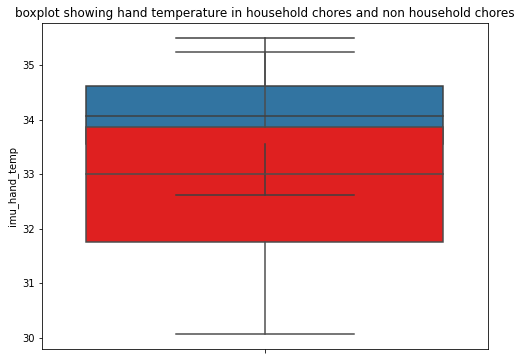

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=household_choresDF["imu_hand_temp"])

leg_hr= sns.boxplot(y=Nonhousehold_choresDF["imu_hand_temp"], color = "red")
plt.title('boxplot showing hand temperature in household chores and non household chores')

Text(0.5, 1.0, 'boxplot showing ankle temperature in household chores and non household chores')

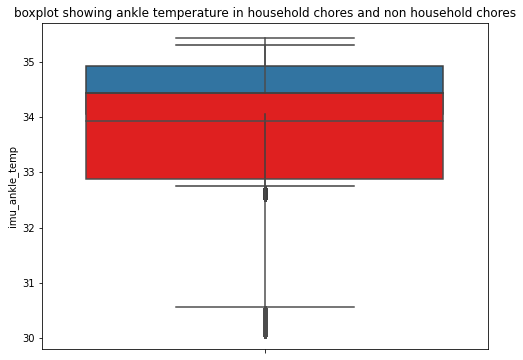

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=household_choresDF["imu_ankle_temp"])

leg_hr= sns.boxplot(y=Nonhousehold_choresDF["imu_ankle_temp"], color = "red")
plt.title('boxplot showing ankle temperature in household chores and non household chores')

In [ ]:
#Exercise activities and non-exercise activities

Exercises_DF = dev_data.loc[(dev_data['activityID']==4)|(dev_data['activityID']==5)|(dev_data['activityID']==6)|(dev_data['activityID']==7)|(dev_data['activityID']==12)|(dev_data['activityID']==13)|(dev_data['activityID']==20)|(dev_data['activityID']==24)]

Non_exercisesDF =dev_data.loc[(dev_data['activityID']==1)|(dev_data['activityID']==2)|(dev_data['activityID']==3)|(dev_data['activityID']==9)|(dev_data['activityID']==10)|
(dev_data['activityID']==11)|(dev_data['activityID']==16)|(dev_data['activityID']==17)|(dev_data['activityID']==18)|(dev_data['activityID']==19)]


Text(0.5, 1.0, 'boxplot showing hand temperature in execersises and non exercises')

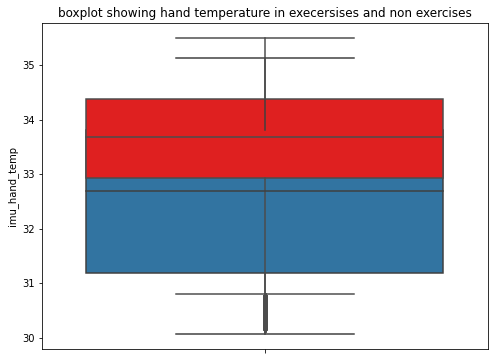

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=Exercises_DF["imu_hand_temp"])

leg_hr= sns.boxplot(y=Non_exercisesDF["imu_hand_temp"], color = "red")
plt.title('boxplot showing hand temperature in execersises and non exercises')

Text(0.5, 1.0, 'boxplot showing ankle temperature in execersises and non exercises')

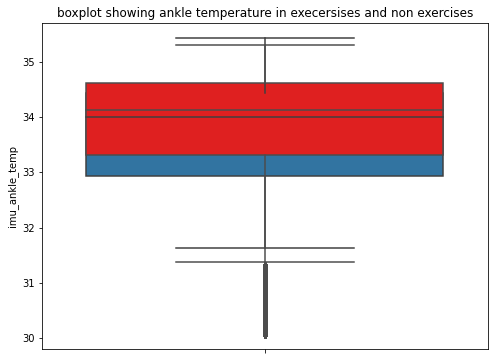

In [ ]:
fig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=Exercises_DF["imu_ankle_temp"])

leg_hr= sns.boxplot(y=Non_exercisesDF["imu_ankle_temp"], color = "red")

plt.title('boxplot showing ankle temperature in execersises and non exercises')

Text(0.5, 1.0, 'boxplot showing chest temperature in execersises and non exercises')

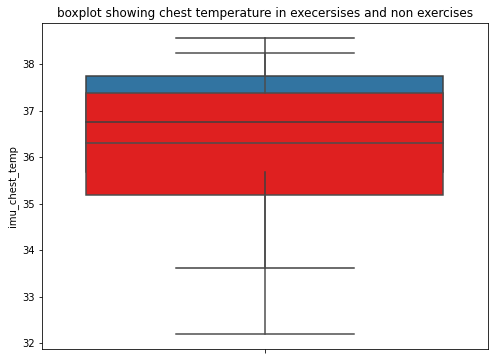

In [ ]:
ig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=Exercises_DF["imu_chest_temp"])

leg_hr= sns.boxplot(y=Non_exercisesDF["imu_chest_temp"], color = "red")
plt.title('boxplot showing chest temperature in execersises and non exercises')

Text(0.5, 1.0, 'boxplot showing heartrate in execersises and non exercises')

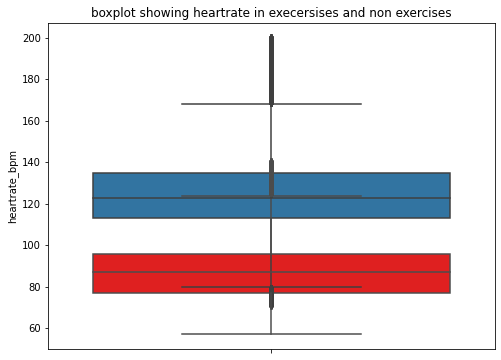

In [ ]:
ig, leg_hr= plt.subplots(figsize=(8,6))

leg_hr= sns.boxplot(y=Exercises_DF["heartrate_bpm"])

leg_hr= sns.boxplot(y=Non_exercisesDF["heartrate_bpm"], color = "red")
plt.title('boxplot showing heartrate in execersises and non exercises')

**Findings**

From the classification of the activities we could see the following:

Moving activities and non moving activities:

1. Moving actvities have a higher heartrate than non Moving activities.
2. Moving actvities have a higher chest temperature than non Moving activities.
3. Non Moving actvities have a higher hand temperature than Moving activities.
4. Moving actvities have the same ankle temeperature level than non Moving. activities

Household chores and Non household chores

1. Household chores have the heartrate range with non Household chores.
2. Household chores have a higher chest temperature than non Household chores.
3. Household chores have a higher hand temperature than non Household chores.
4. Household chores have a higher ankle temeperature level than non Household chores.


Exercise activities and non exercises activities

1. Exercise actvities have a higher heartrate than non Exercise activities.
2. Exercise actvities have a higher chest temperature range than non Exercise activities.
3. Non Exercise actvities have a higher hand temperature range than Exercise activities.
4. Non Exercise actvities have a higher ankle temeperature range than Exercise activities



From the classification and exploration of the different physical activities. It can be seen that:  

Temperature levels increase with certain activities(household chores and exercise). It is important to note that some physical activities such as vacuum cleaning and ironing require external equipment that produce heat to be performed, this is why the temperature for household chores is higher than non household chores. This also affects non exercise activities because vacuum cleaning and ironing were added to the non exercises data frame have.

Therefore, we will drop the ankle and hand temperature variable in our analysis because the imu in the hand and ankle most likely pick up external heat and read it as temperature from the body. 

The focus will be on two variables for the hypothesis testing:

Chest temperature and heartrate

**4. Hypothesis Testing**

Research background

Exploratory Data analysis was conducted on the training data. it gave insights into the dataset. we will now conduct hypothesis testing through statistical tests using the testing data. The testing data was originally gotten from the dataset which was split into for the purpose of this report.




The three testable hypothesis are:

1. If increased heartrate is related to moving activities, then moving activities have a higher heartrate than non moving activities.

2. If increased heartrate is related to intense activities, then intense activities have a higher heartrate than the average moving activities heartrate.

3. if increased temperature is related to household activities, then household activities have a higher temperature than non household activities.


**1st Hypothesis:**

**If increased heartrate is related to moving activities, then moving activities have a higher heartrate than non moving activities.**

H0: there is no significant difference between moving activities heartrate and non moving activities heart rate


H1: there is a significant difference between moving activities heartrate and non moving activities heart rate

This hypothesis test will be conducted using a z test.The z test is best suited to test the hypothesis because it will test if the two population means are different. The data for the hypothesis test will be the heartrate for moving and heartrate for non moving activities, which was originally gotten from the testing dataset. 

To conduct a z test, we need to set a significance level. a significance level is the probability of rejecting the null hypothesis. For this test, the significant level will be 0.05.

In [ ]:
test_data = testing_data

In [ ]:
#leg_activites = ['4','5','6','7','12','13','16','24']
#non_leg_activities = ['1','2','3','9','17']

moving_activitesDFT = test_data.loc[(test_data['activityID']==4)|(test_data['activityID']==5)|(test_data['activityID']==6)|(test_data['activityID']==7)|(test_data['activityID']==12)|
                   (test_data['activityID']==13)|(test_data['activityID']==16)|(test_data['activityID']==24)]

non_moving_activitesDFT =test_data.loc[(test_data['activityID']==1)|(test_data['activityID']==2)|(test_data['activityID']==3)|(test_data['activityID']==9)|(test_data['activityID']==17)]



In [ ]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(moving_activitesDFT['heartrate_bpm'],non_moving_activitesDFT['heartrate_bpm'])

(306.57755351589486, 0.0)

**Results and Findings**

If the p-value is less than 0.05(significance level), we will accept the alternative hypothsis is statistically significant

p_value = 0.0


significance level = 0.05

The pvalue is less than the significance level. Therefore we reject the null hypothesis that there is no significant difference between the means. This means we will accept the alternative hypothesis that states there is significant difference between the means. 

**Therefore increased heartrate is related to moving activities**

**2nd hypothesis**

**IF increased heartrate is related to intense activities, then intense activities have a higher heartrate than average moving activities heartrate.**

Null Hypothesis: Mean is equal to 122 bpm

Alternative hypothesis: Mean is greater than 122 bpm

This hypothesis test will be conducted using a z test.

To conduct a z test, we need to set a significance level. a significance level is the probability of rejecting the null hypothesis. 

significance level = 0.05


In [ ]:
#find the mean for moving activities
moving_activitesDFT['heartrate_bpm'].mean()


122.43104080696928

In [ ]:
#create a dataframe for only the intense activities
running_and_jumpropeDF = test_data.loc[(test_data['activityID']==5)|(test_data['activityID']==24)]


In [ ]:
running_and_jumprope_mean = running_and_jumpropeDF['heartrate_bpm'].mean()
running_and_jumprope_std = running_and_jumpropeDF['heartrate_bpm'].std()
running_and_jumprope_count = running_and_jumpropeDF['heartrate_bpm'].count()

In [ ]:
P_G = (running_and_jumprope_mean - 122.4)/(running_and_jumprope_std / np.sqrt(running_and_jumprope_count))

In [ ]:
from scipy import stats
p_value = 1 - stats.norm.cdf(P_G)

In [ ]:
print(P_G)
print(p_value)

103.16642624559273
0.0


**Results and Findings**

p_value = 0.0


significance level = 0.05


We set the significance level to 0.05. The pvalue is less than the significance level. Therefore we reject the null hypothesis that there is no significant difference between the means. we accept our alternative hypothesis that increased heartrate is related to intense activities. 

**Therefore heartrate greater than 122 bpm should be regarded as intense activities or exercises**

**Third hypothesis**

**if increased temperature is related to household activities, then household activities have a higher temperature than non household activities.**

H0: there is no significant difference between household activities and non household activities.

H1: there is a significant difference between household activities and non household activities

This hypothesis test will be conducted using a z test.The z test is best suited to test the hypothesis because it will test if the two population means are different

To conduct a z test, we need to set a significance level. a significance level is the probability of rejecting the null hypothesis. For this test, the significant level will be 0.05.

In [ ]:
housechores_DF = test_data.loc[(test_data['activityID']==16)|
                            (test_data['activityID']==17)|
                            (test_data['activityID']==18)|
                            (test_data['activityID']==19)]
                            

In [ ]:
Nonhousechores_DF = test_data.loc[(test_data['activityID']==1)|
                            (test_data['activityID']==2)|
                            (test_data['activityID']==3)|
                            (test_data['activityID']==4)|
                            (test_data['activityID']==5)|
                            (test_data['activityID']==6)| 
                            (test_data['activityID']==7)|
                            (test_data['activityID']==9)|
                            (test_data['activityID']==10)|
                            (test_data['activityID']==11)|
                            (test_data['activityID']==12)|
                            (test_data['activityID']==13)|
                             (test_data['activityID']==20)|
                            (test_data['activityID']==24)]

In [ ]:
ztest(housechores_DF['imu_chest_temp'],Nonhousechores_DF['imu_chest_temp'])

(54.05536882874438, 0.0)

**Results and Findings**

p_value = 0.0

Significance level = 0.05

We set the significance level to 0.05. The pvalue is less than the significance level. Therefore we reject the null hypothesis that there is no significant difference between the means.

This means that **Increase in temperature is related to household chores** 

**5. Model building**

A model can be described as a system that uses mathematical concepts and languages. Model building is the process of creating a mathematical representation by learning from training data. 

In this report, one of the requirements to reach the objective is to build atleast one model.

To build a model, we would undergo supervised learning. Supervised learning is the machine learning task of learning a function thats gives an input to an output based on examples of input-output pairs. It is a type of learning where an algorithm needs to see a lot of data which includes inputs 
and outputs in order to predict the corresponding outputs effectively.

In order to build the model, we will be using two modeling algorithms from supervised learning.

1. Logistic Regression
2. Random forest classification

To start the model building, we have to split the dataset into two, training data and testing data. The training data will be used in training the model. The testing data will be used in testing the model.

The training and testing data will be split into 50:50. They are going to be split evenly because we want to avoid the class imbalance problem. Class imbalance problem is the problem where there are more classes in one dataset compared to the other dataset.

Also we will drop the timestamp and subjectid variable because they can cause the predictions of the model to be inaccurate.

The data will also be scaled using the Robust Scaler.The robust scaler was used because we want to reduce the effect of outliers. The data is being scaled because we want the model to find it easy to interpret the data.





In [ ]:
#importing necessary libraries for model building
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

In [ ]:
#splitting the dataset into training and testing
training_data, testing_dataa = train_test_split(data, test_size=0.5, random_state=57)

print(f"No. of training data: {training_data.shape[0]}")
print(f"No. of testing dataa: {testing_data.shape[0]}")

No. of training data: 80422
No. of testing dataa: 80422


In [ ]:
training_data = training_data.drop(['timestamp','subject'],1)
testing_dataa = testing_dataa.drop(['timestamp','subject'],1)

<ipython-input-305-30140352c4f9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  training_data = training_data.drop(['timestamp','subject'],1)
<ipython-input-305-30140352c4f9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testing_dataa = testing_dataa.drop(['timestamp','subject'],1)


In [ ]:
training_datascaled = training_data.copy()
testing_datascaled = testing_dataa.copy()

In [ ]:
scaler = RobustScaler()

In [ ]:
training_datascaled.iloc[:,1:41] = scaler.fit_transform(training_datascaled.iloc[:,1:41])
testing_datascaled.iloc[:,1:41] = scaler.fit_transform(testing_datascaled.iloc[:,1:41])

In [ ]:
#train data
X_Train = training_datascaled.drop(['activityID'],axis = 1)
Y_Train = training_datascaled['activityID'].values


#test data
X_Test = testing_datascaled.drop(['activityID'],axis = 1)
Y_Test = testing_datascaled['activityID'].values

**Evaluating the models**


To evaluate the performance of the models we have built, certain metrics will be used.   



Accuracy:

 This can be defined as number of correctly classified data over the total number of data. It is simply the number of correct predictions the model got correctly. 
              

Precision: 

This can be defined as the overral quality of the predictions, higher precision means there are more relevants results from the model 
 
 

precision is the ability of the classifier to not label a sample as positive if it is negative.

Recall:

This is also called the sensitivity. Recall is the value of positive instances out of the actual positive instances. 

F1-score:
 
The F1 score can be interpreted as a weighted harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. This score weights the recall more than the precision. If the f1 score is 1.0 this means recall and precision are equally important.

In [ ]:
def performance_evaluator (y_true,y_pred):
    a = accuracy_score(y_true, y_pred)
    e = 1-a
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
    print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1 score:%.3f \n"% (a,e,p,r,f1) )

**Principal Component Analysis**

  This is also known as dimensionality reduction, it can be described as reducing the number of features that are used in building a model. The PCA method will be carried out by using the sklearn decomposition library

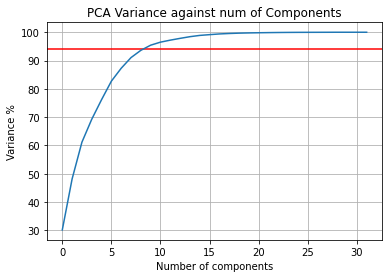

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(testing_dataa)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Components")
plt.ylabel("Variance %")
plt.xlabel("Number of components")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()

In [ ]:
pca = PCA(n_components=8)
X_Train=pca.fit_transform(X_Train)
X_Test=pca.fit_transform(X_Test)

As we can see from the above diagram, the two lines meet at 8 which means 8 components fall at the 94% of the variance. it will now be fitted into our X data as we build the model 

**Logisitic regression**

Logistic regression is a type of machine learning algorithm which is used to predict the probability of a categorical dependent variable.Logistic regression is similiar to linear regression except logistic regression predicts if something is true or false.

To carry out logistic regression:



*  import necessary libraries from python
*   Split the dataset into training and testing
*   Train the model using the training data
*   Make predicitions using the testing data
*   Evaluate the performance of the model







In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_Train,Y_Train)
y_pred = log_reg.predict(X_Test)
performance_evaluator(Y_Test,y_pred)

Accuracy: 0.276 
Error: 0.724 
Precesion: 0.191 
Recall: 0.204 
F1 score:0.158 



**Outcome**

The logistic regression model was trained on the training dataset and tested on testing dataset. dimensionality reduction was performed on the training data used on the model. 

The performance of the model was evaluated using accuracy, precision, recall and F1.

Accuracy: 0.276

Error: 0.724

Precision: 0.193

Recall: 0.204

F1 score: 0.158


It can be noted that the logistic regression model has performed poorly. This could be as a result of the PCA. we will build another logistic regression model but this time without the PCA



In [ ]:
#train data
X_Train2 = training_datascaled.drop(['activityID'],axis = 1)
Y_Train2 = training_datascaled['activityID'].values


#test data
X_Test2 = testing_datascaled.drop(['activityID'],axis = 1)
Y_Test2 = testing_datascaled['activityID'].values

In [ ]:
#2nd logistic regression model without implementing PCA
log_reg = LogisticRegression()
log_reg.fit(X_Train2,Y_Train2)
y_pred2 = log_reg.predict(X_Test2)
performance_evaluator(Y_Test2,y_pred2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.809 
Error: 0.191 
Precesion: 0.782 
Recall: 0.763 
F1 score:0.770 



Outcome

Another logistic regression model was built to see if there was any difference between applying the PCA on the training data or not. these were the outcome values

Accuracy: 0.809

Error: 0.191

Precision: 0.782

Recall: 0.763

F1 score: 0.770

it can be said that the model without the PCA method performed better than the model with the PCA method.

In the next model, we will exclude the PCA method,

**Random forest classification**

Firstly to understand random forest classification, we have to understand what a decision tree is. a decision tree that uses a tree like model to represent a number of possible decisions and an outcome for each decision. Decision trees have a tendency to cause overfitting. To avoid this, we will use Random forest classification.This is a scenerio where we build multiple decision trees and combine their outputs. Random forest classifier creates a set of decision trees from randomly selected subset of training set. it then aggregatea the votes from different decision trees to decide the final class of the test object


To carry out Random forest classification:



*  import necessary libraries from python
*   Split the dataset into training and testing
*   Train the model using the training data
*   Make predicitions using the testing data
*   Evaluate the performance of the model

In [ ]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_Train2,Y_Train2)

#testing on test data 
y_pred_rf = rfc.predict(X_Test2)
performance_evaluator(Y_Test2,y_pred_rf)
print(y_pred_rf)


Accuracy: 0.994 
Error: 0.006 
Precesion: 0.994 
Recall: 0.993 
F1 score:0.994 

[17  4  3 ... 16 13  4]


**Outcome**

The Random Forest Classifier model was trained on the training dataset and tested on testing dataset. The performance of the model was evaluated using accuracy, precision, recall and F1.

Accuracy: 0.994

Error: 0.0006


Precision: 0.994

Recall: 0.993

F1 score: 0.994

Overral, it can be said that the model was a good fit for the dataset.

**6. Summary**

The objective of this report is to analyse the pamaap2 dataset which contained physical activities done by 9 subjects. 9 subjects which consisted of 1 female and 8 males. The activities were recorded using 3 IMU's and 1 heart rate monitor.


The following steps were completed in this report


1. Handling missing data or dirty data:  Missing and dirty data were handled by dropping columns which according to the readme file wont aid the analysis and filtering the dataset to keep only relevant values in the columns


2. Thorough exploratory data analysis: After cleaning the dataset, exploratory data analysis was done on the training set.it was noted that there was a correlation between chest and hand temperature.  We focused on variables Heartrate and temperature. there were different temperature and heartrate levels for different activity IDs. Therefore, The activity id was also classified further into seperate classes to explore the data


3. Hypothesis Testing: After exploration of data, some relationships were discovered which led to hypothesis testing.

    The testable hypothesis were:

   * If increased heartrate is related to moving activities, then moving activities have a higher heartrate than non moving activities.

   *   IF increased heartrate is related to intense activities, then intense activities have a higher heartrate than average moving activities heartrate.

   *   if increased temperature is related to household activities, then household activities have a higher temperature than non household activities.

4. To develop atleast one model

    For this step we used supervised learning algorithms to build models. Logistic regression and Random Forest classifier were used. 
    PCA (Dimensionality reduction) was applied on the logistic regression model and the model was very poor. a second logistic regression model was built without applying PCA and it performed very well.  
    The logistic regression model and the random forest classifier were both  trained on the training data and tested on the testing data. Although both models performed well, the random forest classifier did significantly better than the logistic regression. They were both evaluated using performance metrics such as accuracy, precision, recall and F1.

**6.1 Actionable Insights**

After thorough exploratory data analysis, hypothesis testing and model building. some actionable insights could be gotten from this dataset

1. Increased temperature shows household activities like ironing or vacuum cleaning are being carried out.

2. Increased heart shows intense activities or exercises are being done.

3. heartrate less than  could indicate the person is sitting, lying or doing computer work.

4. heartrate greater than   could indicate the person is engaging in a physical activity.

**7. Recommendations**

I have a few recommendations that i believe will aid the goal of creating a software and hardware that monitors types of physical activity

The hardware can be a chest piece(worn around the chest area): In the analysis it was observed that the ankle imu and hand imu picked up external contributors of heat. Therefore i believe a chest monitor would be the most accurate form of measurement.

The software should be an website application, i recommend it should a web application where consumers will have their login details to access the website and see their personal data.This is because of the amount of data being collected each minute. If the software is an application which the consumer installs on the phone, the influx of data can cause their phones to glitch.

Thank you

**8. References**

1. Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set
http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

2.  The Role of Physical Activity and Exercise in Preventive Cardiology

   https://www.sciencedirect.com/science/article/abs/pii/S0025712521001619g

3. Why Does Body Temperature Increase During Exercise? [Accessed January 2023]

    https://www.livestrong.com/article/361702-why-does-body-temperature-increase-during-exercise/

4.  Various ways to evaluate a machine learning model’s performance [Accessed January 2023]

   https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15

5.  Data Science from scratch: first principles in python(2019) - Joel Grus 

6. Introduction to Data Science : A Python Approach to Concepts, Techniques and Applications (2018) - Laura Igual, Santi Seguí, Jordi Vitrià, Eloi Puertas, Petia Radeva, Oriol Pujol, Sergio Escalera, Francesc Dantí, and Lluís Garrido

7. Logistic Regression [Accessed January 2023]

   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

8. Random Forest Classificatier [Accessed January 2023]

   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
9. Sklearn decomposition [Accessed January 2023]

   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html




In [ ]:
import io
from nbformat import current

filepath="/content/drive/MyDrive/Colab Notebooks/DSRM_PROJECT.ipynb"
question_count=0

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 4034
